<a href="https://colab.research.google.com/github/EktaSingh1612/LGMVIP/blob/main/develop_a_NN_that_can_read_handwriting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#LGMVIP Data Science Internship

##Author : EKTA SINGH
##Advanced Level Task: Develop A Neural Network That Can Read Handwriting:
###Technique used: CNN

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers, datasets, models
from tensorflow.keras.models import Sequential

# Prepare Dataset

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

print("TRAIN IMAGES: ", train_images.shape)
print("TEST IMAGES: ", test_images.shape)

11501568/11490434 [==============================] - 0s 0us/step
TRAIN IMAGES:  (60000, 28, 28, 1)
TEST IMAGES:  (10000, 28, 28, 1)


# Create Model

In [ ]:
num_classes = 10
img_height = 28
img_width = 28

model = Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

#Compile Model

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        18464     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 16)         0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 6, 6, 64)          9

#Train Model

In [ ]:
epochs = 10
history = model.fit(
  train_images, 
  train_labels,
  epochs = epochs
)


Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1875/1875 [==============================] - 212s 112ms/step - loss: 0.1377 - accuracy: 0.9574
Epoch 2/10
1875/1875 [==============================] - 192s 103ms/step - loss: 0.0449 - accuracy: 0.9856
Epoch 3/10
1875/1875 [==============================] - 191s 102ms/step - loss: 0.0338 - accuracy: 0.9892
Epoch 4/10
1875/1875 [==============================] - 191s 102ms/step - loss: 0.0273 - accuracy: 0.9914
Epoch 5/10
1875/1875 [==============================] - 191s 102ms/step - loss: 0.0225 - accuracy: 0.9930
Epoch 6/10
1875/1875 [==============================] - 190s 101ms/step - loss: 0.0193 - accuracy: 0.9940
Epoch 7/10
1875/1875 [==============================] - 190s 102ms/step - loss: 0.0159 - accuracy: 0.9948
Epoch 8/10
1875/1875 [==============================] - 191s 102ms/step - loss: 0.0144 - accuracy: 0.9953
Epoch 9/10
1875/1875 [==============================] - 191s 102ms/step - loss: 0.0127 - accuracy: 0.9956
Epoch 10/10
1875/1875 [==============================] - 

#Visualize Training Results

Text(0.5, 1.0, 'Training Accuracy and Loss')

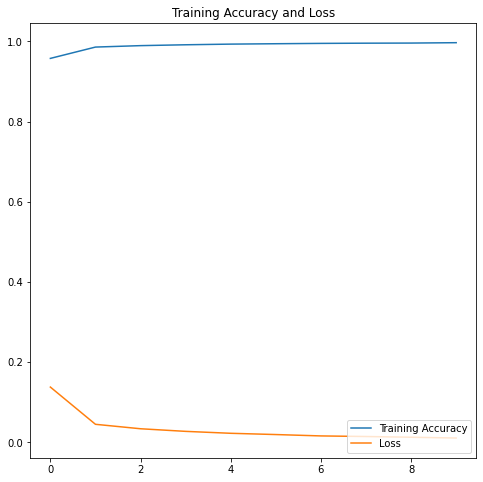

In [ ]:
acc = history.history['accuracy']
loss=history.history['loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, loss, label='Loss')
plt.legend(loc='lower right')
plt.title('Training Accuracy and Loss')

#Test Image

Prediction of model: [1.0000000e+00 1.4362493e-07 9.2432674e-05 2.5064522e-09 4.3978238e-07
 1.0130678e-08 2.9294789e-02 4.4194428e-07 6.0221694e-09 1.7210841e-03]


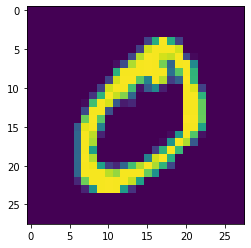

In [ ]:
image = (train_images[1]).reshape(1,28,28,1)
model_pred = model.predict(image, verbose=0)
plt.imshow(image.reshape(28,28))
print('Prediction of model: {}'.format(model_pred[0]))

Prediction of model: [3.5913513e-07 1.2370646e-03 1.3630622e-05 2.7244894e-06 1.0000000e+00
 9.0201178e-07 1.6180189e-05 1.5417039e-03 8.2500577e-03 3.8282129e-01]


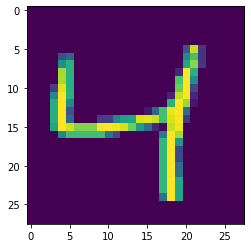

In [ ]:
image = (train_images[2]).reshape(1,28,28,1)
model_pred = model.predict(image, verbose=0)
plt.imshow(image.reshape(28,28))
print('Prediction of model: {}'.format(model_pred[0]))

#Test Multiple Image

Test images array shape: (4, 28, 28)
Predicted digit: [1.1014351e-01 2.2327474e-01 1.0000000e+00 4.2302310e-03 1.7394537e-07
 9.3975192e-12 2.2436710e-07 6.2940866e-02 1.1912245e-08 8.1707006e-09]
Predicted digit: [6.5261126e-04 9.9999690e-01 9.3337893e-03 4.6449900e-04 7.5402856e-04
 6.0865581e-03 1.6501397e-02 2.0367464e-01 1.4580518e-02 1.0733795e-04]
Predicted digit: [1.0000000e+00 6.5966015e-06 5.2816480e-02 8.6182399e-06 1.7741323e-04
 9.9809959e-06 5.3694606e-02 1.1067092e-03 2.3949513e-05 1.1146039e-02]
Predicted digit: [2.8770141e-06 2.5899400e-05 3.7491216e-06 6.2120722e-05 1.0000000e+00
 1.1464383e-05 1.2426347e-02 5.6688954e-05 3.2573578e-01 9.3749166e-01]


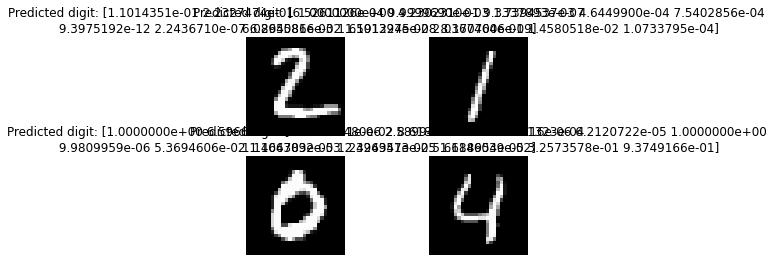

In [ ]:
images = test_images[1:5]
images = images.reshape(images.shape[0], 28, 28)
print ("Test images array shape: {}".format(images.shape))


for i, test_image in enumerate(images, start=1):

    org_image = test_image
    test_image = test_image.reshape(1,28,28,1)
    prediction = model.predict(test_image, verbose=0)

    print ("Predicted digit: {}".format(prediction[0]))
    plt.subplot(220+i)
    plt.axis('off')
    plt.title("Predicted digit: {}".format(prediction[0]))
    plt.imshow(org_image, cmap=plt.get_cmap('gray'))

plt.show()